>>> # Random Forest on Cancer Data

# Importing Libraries and Loading Data

In [1]:
import pandas as pd

cancer_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv" )

In [2]:


# data splitting
from sklearn.model_selection import train_test_split

# metrics
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report

# logistic model
from sklearn.ensemble import RandomForestClassifier

# CV

# Scaling
from sklearn.preprocessing import StandardScaler


In [3]:
# layout
import seaborn as sns
sns.set(color_codes=True,rc={'figure.figsize':(25,25)})

# Exploratory Data Analysis

In [4]:
cancer_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,"(48021.6, 51046.4]",48.4,49.6,46.4,"Hettinger County, North Dakota",2.25,65.9,10.8,25.0,57.4,6.8,37.1,12.2,57.4,1.1,81.2,56.0,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,"(54545.6, 61494.5]",41.9,41.3,43.2,"Mills County, Iowa",2.63,58.6,22.3,29.1,NaN,1.1,35.9,16.0,60.4,3.8,76.7,NaN,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,"(37413.8, 40362.7]",48.9,47.9,49.9,"Gladwin County, Michigan",2.30,57.2,24.9,36.2,NaN,3.5,40.2,7.6,41.2,11.0,61.6,NaN,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,"[22640, 34218.1]",44.2,42.7,45.2,"Fentress County, Tennessee",2.43,53.0,10.9,51.8,NaN,5.3,44.2,7.0,41.6,10.4,45.2,NaN,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,"(37413.8, 40362.7]",45.0,42.2,48.0,"Las Animas County, Colorado",2.36,52.2,12.6,31.2,NaN,0.2,28.3,10.5,49.3,9.2,56.6,NaN,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


In [5]:
cancer_data.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
count,3051.000000,3051.000000,3051.000000,3051.000000,3.051000e+03,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,785.000000,3051.000000,3051.000000,3051.000000,2899.000000,3051.000000,3051.000000,2447.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000
mean,570.668154,176.000983,449.007042,46902.917076,9.495799e+04,16.880367,158.695936,44.303540,39.600885,42.234579,2.473048,51.885480,18.225139,34.920190,41.247898,6.131957,34.909440,13.212750,54.115626,7.841069,64.519338,48.573314,41.342347,36.287545,19.198820,84.005243,9.166570,1.198561,1.864829,51.355837,5.608851,178.909767
std,1250.546532,445.042777,52.886386,11902.460659,2.761007e+05,6.340462,544.035590,38.704107,5.177629,5.253474,0.429926,6.812846,8.105799,9.021475,11.107006,4.552222,7.015728,5.360342,8.267656,3.454863,10.511932,10.011218,9.327793,7.748442,6.023164,16.126982,14.676772,2.369931,3.235204,6.524964,1.955201,27.570075
min,6.000000,3.000000,211.100000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.022100,25.100000,0.000000,0.000000,7.100000,0.000000,7.500000,3.200000,17.600000,0.400000,23.400000,16.800000,14.300000,11.800000,2.600000,11.008762,0.000000,0.000000,0.000000,23.915652,0.000000,66.300000
25%,80.000000,29.000000,421.800000,38752.000000,1.236850e+04,12.200000,0.000000,37.900000,36.400000,39.200000,2.370000,47.800000,12.800000,29.300000,34.000000,3.100000,30.650000,9.300000,48.600000,5.500000,57.500000,41.300000,34.700000,31.000000,14.900000,78.012571,0.616576,0.261748,0.282825,47.736828,4.499936,161.400000
50%,171.000000,62.000000,453.549422,45098.000000,2.677700e+04,15.900000,0.000000,41.000000,39.500000,42.400000,2.500000,52.500000,17.200000,34.700000,41.000000,5.300000,35.400000,12.300000,54.400000,7.600000,65.300000,48.700000,41.300000,36.300000,18.800000,90.318790,2.276756,0.557031,0.791571,51.757925,5.384471,178.300000
75%,508.000000,148.000000,481.300000,52410.500000,6.853600e+04,20.400000,86.581336,43.900000,42.500000,45.300000,2.630000,56.500000,22.600000,40.700000,46.900000,8.100000,39.700000,16.100000,60.300000,9.700000,72.200000,55.700000,47.700000,41.400000,23.000000,95.577396,10.326954,1.189955,2.080241,55.465803,6.473896,195.500000
max,24965.000000,9445.000000,1206.900000,125635.000000,5.238216e+06,47.000000,9762.308998,525.600000,64.700000,65.700000,3.930000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000,40.400000,76.500000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,84.866024,35.640183,38.743747,71.703057,21.326165,362.800000


In [6]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3051 non-null   float64
 1   avgDeathsPerYear         3051 non-null   int64  
 2   incidenceRate            3051 non-null   float64
 3   medIncome                3051 non-null   int64  
 4   popEst2015               3051 non-null   int64  
 5   povertyPercent           3051 non-null   float64
 6   studyPerCap              3051 non-null   float64
 7   binnedInc                3051 non-null   object 
 8   MedianAge                3051 non-null   float64
 9   MedianAgeMale            3051 non-null   float64
 10  MedianAgeFemale          3051 non-null   float64
 11  Geography                3051 non-null   object 
 12  AvgHouseholdSize         3051 non-null   float64
 13  PercentMarried           3051 non-null   float64
 14  PctNoHS18_24            

In [7]:
cancer_data.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2266
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     604
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarri

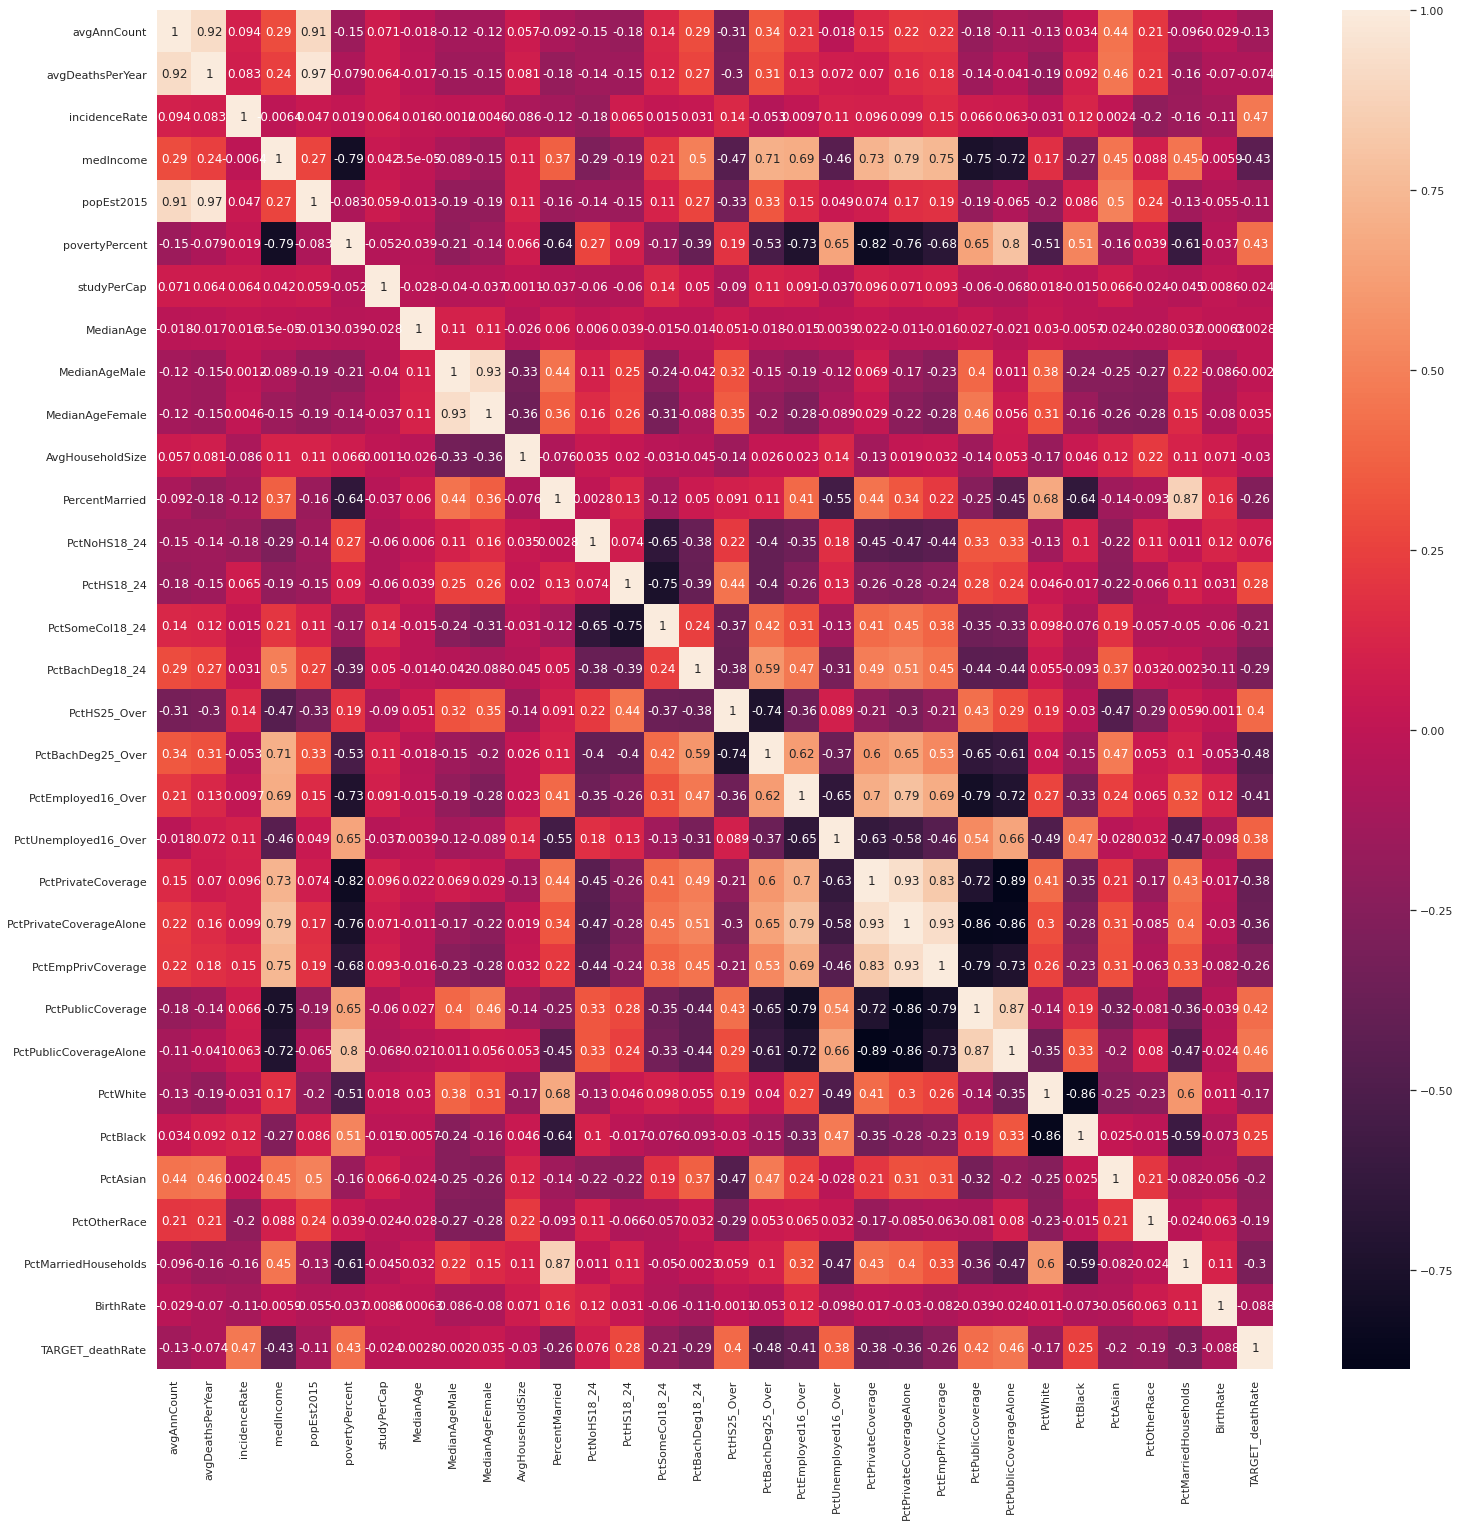

In [8]:
cancer_corr = cancer_data.corr()
sns.heatmap(cancer_corr,annot=True)

In [ ]:
# removing unnecessary or less relevant

In [9]:
cancer_data.drop(['binnedInc', 'Geography', 'PctSomeCol18_24'],axis=1,inplace=True)

In [10]:
cancer_data['PctEmployed16_Over'].fillna(cancer_data['PctEmployed16_Over'].mean(),inplace=True)

In [11]:
cancer_data['PctPrivateCoverageAlone'].fillna(cancer_data['PctPrivateCoverageAlone'].mean(),inplace=True)

# Separate the Input and Target Features of the data

In [12]:
y = cancer_data['TARGET_deathRate']
X = cancer_data.drop('TARGET_deathRate',axis=1)

# Data Preprocessing and  Split the data into Train and Test Sets

In [13]:
scaler = StandardScaler()

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([281, 617, 633, ...,  60, 740, 355])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02)

In [16]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Classifier and then hyperparameter tuning

In [17]:
clf = RandomForestClassifier(n_estimators=15)


In [18]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
pred = clf.predict(X_test)

In [20]:
accuracy_score(y_test, pred)

0.5

In [21]:
confusion_matrix(y_test, pred)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
from sklearn.model_selection import GridSearchCV

In [70]:
parameters = {
    'n_estimators':(10,20,30),
    'criterion':('gini','entropy'),
    'max_depth':(3,5,7),
    'min_samples_split':(2,4,6)

}


In [71]:
gsc = GridSearchCV(clf, param_grid=parameters,cv=3, verbose=True)

In [72]:
gscmodel = gsc.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:  6.5min finished


In [73]:
gsc.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
gsc.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_split': 6,
 'n_estimators': 30}

In [28]:
gsc.best_score_

0.4245564672598787

After selecting best parameters for random forest

In [75]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
pred_rf = rf.predict(X_test)

In [78]:
rf.score(X_test,y_test)

0.532258064516129

In [79]:
rf.score(X_train, y_train)

0.9628638340582134

In [80]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Testing_set_label.csv')

In [81]:
test_data.drop(['binnedInc', 'Geography', 'PctSomeCol18_24'],axis=1,inplace=True)

In [82]:
test_data.isnull().sum()

avgAnnCount                  0
avgDeathsPerYear             0
incidenceRate                0
medIncome                    0
popEst2015                   0
povertyPercent               0
studyPerCap                  0
MedianAge                    0
MedianAgeMale                0
MedianAgeFemale              0
AvgHouseholdSize             0
PercentMarried               0
PctNoHS18_24                 0
PctHS18_24                   0
PctBachDeg18_24              0
PctHS25_Over                 0
PctBachDeg25_Over            0
PctEmployed16_Over          33
PctUnemployed16_Over         0
PctPrivateCoverage           0
PctPrivateCoverageAlone    148
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
PctWhite                     0
PctBlack                     0
PctAsian                     0
PctOtherRace                 0
PctMarriedHouseholds         0
BirthRate                    0
dtype: int64

In [83]:
test_data['PctEmployed16_Over'].fillna(test_data['PctEmployed16_Over'].mean(),inplace=True)
test_data['PctPrivateCoverageAlone'].fillna(test_data['PctPrivateCoverageAlone'].mean(),inplace=True)

In [84]:
pred_test = rf.predict(test_data)

In [85]:
test_data['TargetDeathRate']=pred_test

In [86]:
test_data['TargetDeathRate'].to_csv('Dthon.csv',index=False)

In [ ]:
# continued